In [416]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

#Accessing text
text = open('sawyr10.txt')
tom_text = text.read()
print 'Tom Sawyer Text\n'

#Remove Punctuations
tom_words2 = sent_tokenize(tom_text)
token = RegexpTokenizer(r'\w+') 
tom_words = token.tokenize(tom_text)

tommy = []
for word in tom_words:
    if ('1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9' or '0') in word:
        continue
    elif "'" in word:
        word.replace("'",'')
    else:
        tommy.append(word)
        
tom_words = tommy


Tom Sawyer Text



In [417]:
#Word Frequency 
tom_dict = {}

for word in tom_words:
    if word in tom_dict:
        tom_dict[word] = tom_dict[word] + 1
    else:
        tom_dict[word] = 1

In [418]:
#Frequency of word frequency 
tom_dict_2 = {}

for word in tom_words:
    if tom_dict[word] in tom_dict_2:
        tom_dict_2[tom_dict[word]] = tom_dict_2[tom_dict[word]] + 1
    else:
        tom_dict_2[tom_dict[word]] = 1        
        
#Tokens
print 'Total tokens: %d'%(len(tom_words))

#Type
print 'Total types: %d'%(len(tom_dict))

#TTR 
ttr = float(len(tom_dict))/len(tom_words)
print 'TTR: %f \n'%(ttr)

Total tokens: 74008
Total types: 8050
TTR: 0.108772 



In [419]:
import numpy as np
import matplotlib.pyplot as plt

In [420]:
tom_dict_sam = {}
for i in range(len(tom_words2)):
    tom_words2[i] = token.tokenize(tom_words2[i])
    
    c = 0

    for word in tom_words2[i]:
        if word in tom_dict_sam:
            tom_dict_sam[word] = tom_dict_sam[word] + 1
        else:
            tom_dict_sam[word] = 1
            c= c+1
    
    tom_words2[i] = [c, len(tom_words2[i])]


In [421]:
#Heap's law
x = [0]
y = [0]

for i in range(len(tom_words2)):
    x.append(x[i] + tom_words2[i][1])
    y.append(y[i] + tom_words2[i][0])



In [422]:
import scipy

from scipy.optimize import curve_fit

def func(x,k,b):
    return k*(x**b)

popt, pcov = curve_fit(func, x, y)

In [423]:
K = popt[0]
beta = popt[1]

In [424]:
#Heap's law's parameters
print ("Heap's law")
print ('K = %f, Beta = %f'%(K,beta))

Heap's law
K = 10.793360, Beta = 0.592674


In [425]:
y_test = []
for i in x:
    y_test.append(K*(i**beta))

BLUE is Emperical while RED is the fitted curve via Heap's law

|V| = K(N)^beta = 10.793360(N)^0.592674


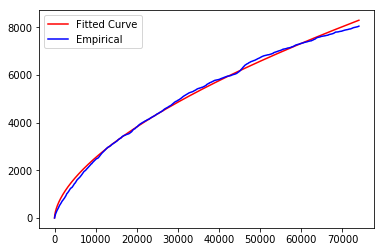

In [426]:
plt.plot(x,y_test,'r',label ='Fitted Curve')
plt.plot(x,y,'b',label='Empirical')
plt.legend()

print ("BLUE is Emperical while RED is the fitted curve via Heap's law\n")
print ('|V| = K(N)^beta = %f(N)^%f'%(K,beta))

In [427]:
#Zipf's law - Word frequency 
word_freq_inp = list(tom_dict)

In [428]:
word_freq = []
for i in word_freq_inp:
    word_freq.append([i,tom_dict[i]])

In [429]:
from operator import itemgetter
word_freq.sort(key=itemgetter(1))

In [430]:
t=[]
f=[]
r=[]
l=[]

for i in range(len(word_freq)):
    word_freq[i].append(len(word_freq[i][0]))

t=[]
t.append(word_freq[0])

for arr in word_freq:
    if arr[1] != t[-1][1]:
        t.append(arr)

t_new = []        
for i in range(len(t)):
    t_new.append(t[-(i+1)])
    f.append(t_new[i][1])
    r.append(i+1)
    l.append(t_new[i][2])
        

word_freq = t_new        

In [431]:
theta = 7000

for i in range(1000):

    J = 0
    for i in range(len(f)):
        J = J + ((theta/f[i]) - r[i])/f[i]

    theta = theta - 0.0001*(J)

In [432]:
r_test = []
for i in f:
    r_test.append(theta*(i**(-1)))

Zipf's law - Word frequency

BLUE is Emperical while RED is the fitted curve using gradient descent according to Zipf's law

r = Rank, f = Word frequency

f.r = 6024.785567 = A.N
A = 6024.785567/74008 = 0.081407 ~ 0.1
Zipf's law in this case does not work in the case when number of type = number of tokens


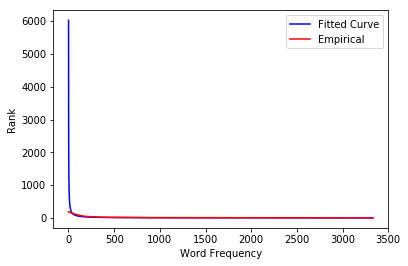

In [433]:
plt.plot(f,r_test,'b', label = 'Fitted Curve')
plt.plot(f,r,'r', label = 'Empirical')
plt.legend()

plt.xlabel('Word Frequency')
plt.ylabel('Rank')
print ("Zipf's law - Word frequency\n")
print ("BLUE is Emperical while RED is the fitted curve using gradient descent according to Zipf's law\n")
print ('r = Rank, f = Word frequency\n')
print ('f.r = %f = A.N'%(theta))
print ('A = %f/%d = %f ~ 0.1'%(theta,len(tom_words), theta/len(tom_words)))

print ("Zipf's law in this case does not work in the case when number of type = number of tokens")

Zipf's law - Word length

BLUE is Emperical while RED is the fitted curve using gradient descent according to Zipf's law

l = Word length, f = Word frequency

f.l = 10.038223
Zipf's law in this case does not work in the case of nouns such as protaganist's name - 'Tom' 


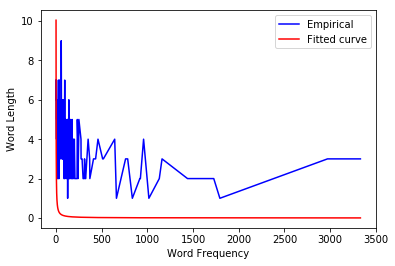

In [434]:
theta_1 = 10

for i in range(3000):

    J = 0
    for i in range(len(f)):
        J = J + ((theta_1/f[i]) - l[i])/f[i]

    theta_1 = theta_1 - 0.000001*(J)

l_test = []
for i in f:
    l_test.append(theta_1*(i**(-1)))

plt.plot(f,l,'b',label = 'Empirical')
plt.plot(f,l_test,'r', label = 'Fitted curve')
plt.legend()

plt.xlabel('Word Frequency')
plt.ylabel('Word Length')

print ("Zipf's law - Word length\n")
print ("BLUE is Emperical while RED is the fitted curve using gradient descent according to Zipf's law\n")
print ('l = Word length, f = Word frequency\n')
print ('f.l = %f'%(theta_1))

print ("Zipf's law in this case does not work in the case of nouns such as protaganist's name - 'Tom' ")

In [435]:
#Zipf's law - Meanings
from nltk.corpus import wordnet

print ("Zipf's law - Meanings of the word\n")
print ("Examples which follow Zipf's law:\n")

mean = []
for word in word_freq:
    syns = wordnet.synsets(word[0])
    if len(syns) == 0:
        continue
    else:
        word.append(len(syns))
        mean.append(word)
        #2, 10, 12 13 16 17 18 20 22 -1 -2 -3

Zipf's law - Meanings of the word

Examples which follow Zipf's law:



In [436]:
c = [ 9, 12, 15, 16, 17, 19, 21, 47, 87, 102, 144, 145, 146]
for i in c:
    mean[i][1] = (mean[i][1])**(0.5) 
    print ("Word =%s, Frequency = %d, Number of meanings = %d"%(mean[i][0],(mean[i][1])**2,mean[i][3]))


Word =had, Frequency = 510, Number of meanings = 19
Word =said, Frequency = 352, Number of meanings = 12
Word =be, Frequency = 310, Number of meanings = 14
Word =up, Frequency = 304, Number of meanings = 14
Word =so, Frequency = 297, Number of meanings = 11
Word =out, Frequency = 279, Number of meanings = 17
Word =were, Frequency = 274, Number of meanings = 13
Word =just, Frequency = 131, Number of meanings = 10
Word =heart, Frequency = 69, Number of meanings = 10
Word =told, Frequency = 47, Number of meanings = 8
Word =Western, Frequency = 2, Number of meanings = 6
Word =cussed, Frequency = 2, Number of meanings = 2
Word =raining, Frequency = 1, Number of meanings = 2


In [437]:
X_mean =[]
Y_mean =[]
for i in c: 
    X_mean.append(mean[i][1])
    Y_mean.append(mean[i][3])

BLUE is Emperical while RED is the fitted curve using gradient descent according to Zipf's law

Zipf's law in this case does not work in the case of small(length) function words as their frequency is very high but their they have very less meaning such as 'the', 'a'


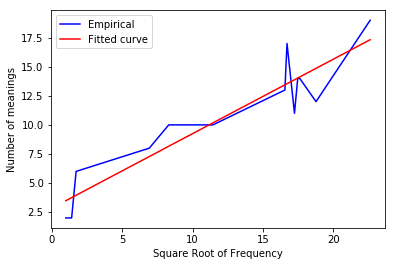

In [438]:
def func(x,a,b):
    return a*x + b

popt, pcov = curve_fit(func, X_mean, Y_mean)

Y_test = []
for i in X_mean:
    Y_test.append(popt[0]*(i) + popt[1])

print ("BLUE is Emperical while RED is the fitted curve using gradient descent according to Zipf's law\n")    
plt.plot(X_mean,Y_mean,'b', label = 'Empirical')
plt.plot(X_mean,Y_test,'r', label = 'Fitted curve')
plt.legend()

plt.xlabel('Square Root of Frequency')
plt.ylabel('Number of meanings')


print ("Zipf's law in this case does not work in the case of small(length) function words as their frequency is very high but their they have very less meaning such as 'the', 'a'")